In [1]:
import pandas as pd
# Load the dataset 
file_path = "bank.csv"  
data = pd.read_csv(file_path, sep=';')
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [2]:
from sklearn.preprocessing import LabelEncoder
# Encode all categorical columns
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le 
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3,0
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0,0
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0,0
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,-1,0,3,0
4,59,1,1,1,0,0,1,0,2,5,8,226,1,-1,0,3,0


In [7]:
from sklearn.model_selection import train_test_split
# Features (X) and target variable (y)
X = data.drop(columns=['y'])  # Drop the target column
y = data['y']  # Target variable (encoded as 0 or 1)
# Split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

Training set size: (3616, 16)
Test set size: (905, 16)


In [9]:
from sklearn.tree import DecisionTreeClassifier
# Initialize the model
dt_classifier = DecisionTreeClassifier(random_state=42)
# Train (fit) the model
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [11]:
from sklearn.metrics import accuracy_score, classification_report
# Predict on the test set
y_pred = dt_classifier.predict(X_test)
# Print evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8718232044198895
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.92      0.93       807
           1       0.42      0.47      0.44        98

    accuracy                           0.87       905
   macro avg       0.68      0.70      0.68       905
weighted avg       0.88      0.87      0.88       905



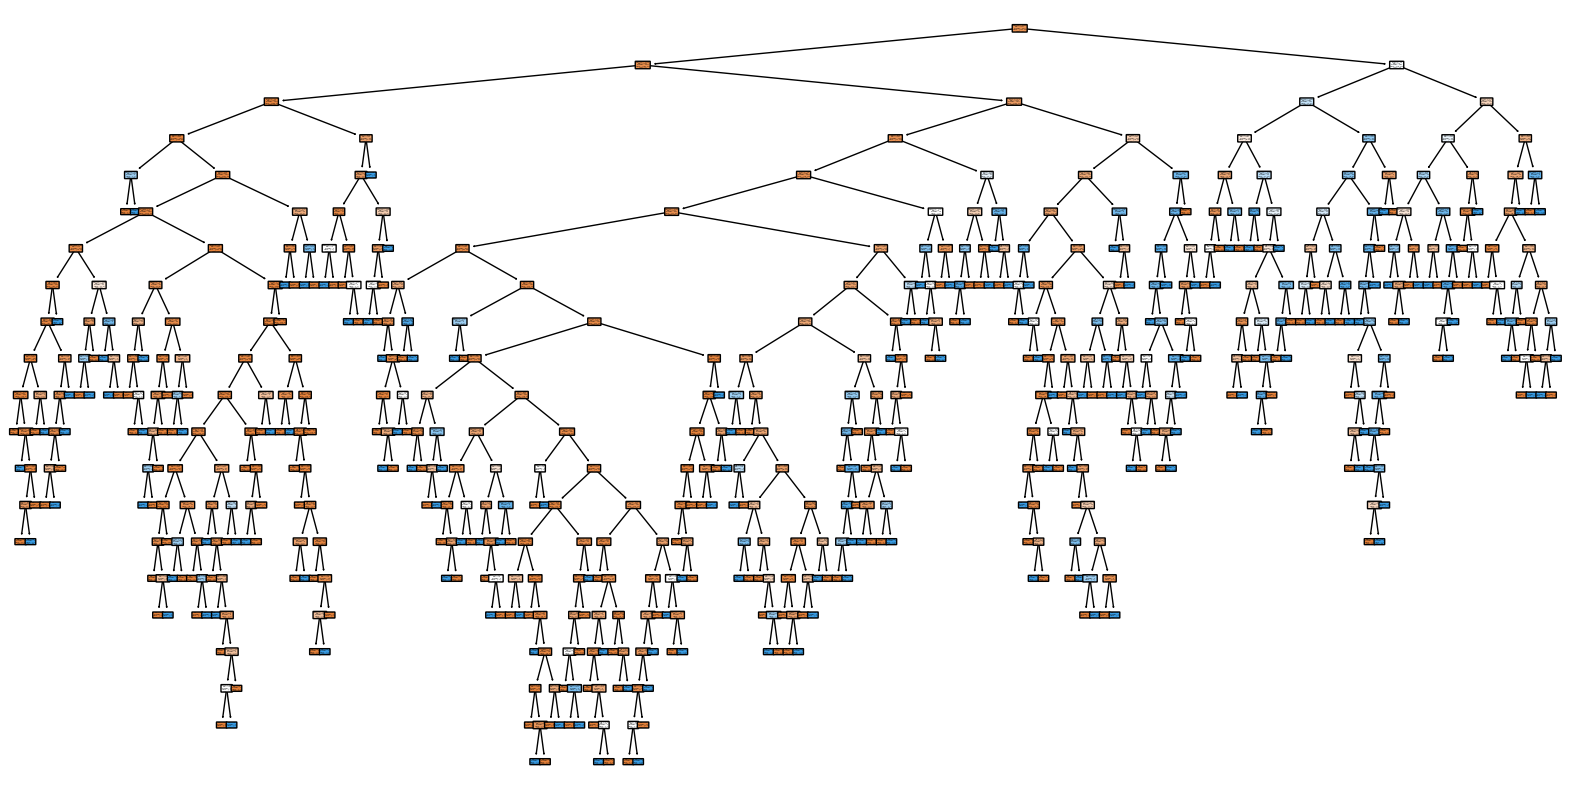

In [15]:
plt.figure(figsize=(20, 10))
plot_tree(dt_classifier, feature_names=X.columns, class_names=['No', 'Yes'], filled=True, rounded=True)
plt.savefig("decision_tree.png", dpi=300, bbox_inches='tight')  
plt.show()

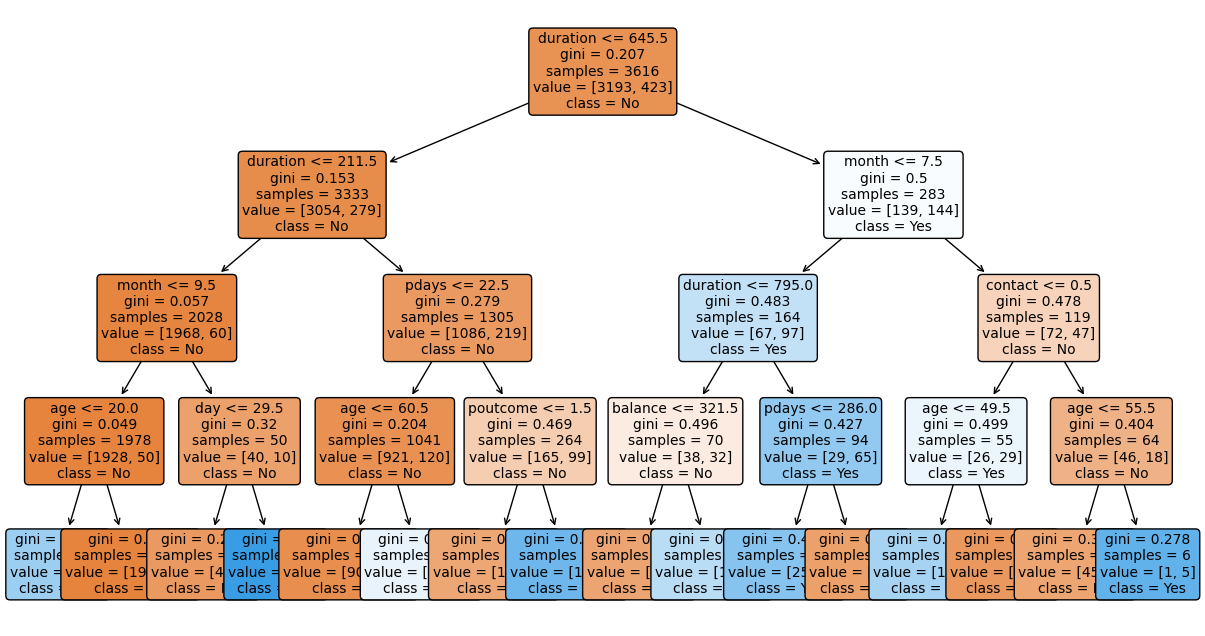

In [16]:
dt_classifier = DecisionTreeClassifier(max_depth=4, random_state=42)  # Set max_depth=4 (adjust as needed)
dt_classifier.fit(X_train, y_train)
# Replot the tree
plt.figure(figsize=(15, 8))  # Adjust figure size
plot_tree(dt_classifier, feature_names=X.columns, class_names=['No', 'Yes'], filled=True, rounded=True, fontsize=10)
plt.show()


In [18]:
import numpy as np
# Get top 5 important features
importances = dt_classifier.feature_importances_
indices = np.argsort(importances)[::-1][:5]  # Get top 5 features
print("Top 5 important features:")
for i in indices:
    print(f"{X.columns[i]} - Importance: {importances[i]:.4f}")

Top 5 important features:
duration - Importance: 0.5534
poutcome - Importance: 0.1333
pdays - Importance: 0.1328
age - Importance: 0.0973
month - Importance: 0.0356


In [20]:
dt_classifier = DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=42)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=42)

In [22]:
feature_importances = pd.Series(dt_classifier.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False)

duration     0.498711
pdays        0.136673
poutcome     0.116226
age          0.100229
month        0.052749
day          0.036662
balance      0.027788
contact      0.013389
campaign     0.009782
housing      0.007790
job          0.000000
marital      0.000000
education    0.000000
default      0.000000
loan         0.000000
previous     0.000000
dtype: float64

In [99]:
from sklearn.ensemble import RandomForestClassifier
# Initialize Random Forest model with 100 trees
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
# Train the model
rf_classifier.fit(X_train, y_train)


RandomForestClassifier(random_state=42)


In [26]:
from sklearn.metrics import accuracy_score, classification_report
# Predict on test data
y_pred_rf = rf_classifier.predict(X_test)
# Evaluate performance
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.901657458563536
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95       807
           1       0.60      0.27      0.37        98

    accuracy                           0.90       905
   macro avg       0.76      0.62      0.66       905
weighted avg       0.88      0.90      0.88       905



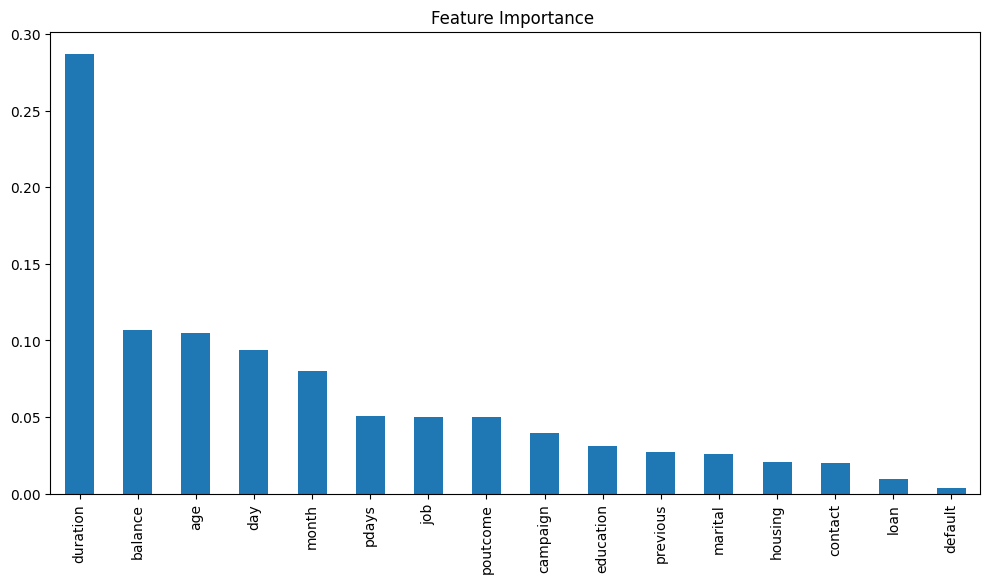

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
# Get feature importances
feature_importances = pd.Series(rf_classifier.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False).plot(kind='bar', figsize=(12,6))
plt.title("Feature Importance ")
plt.show()

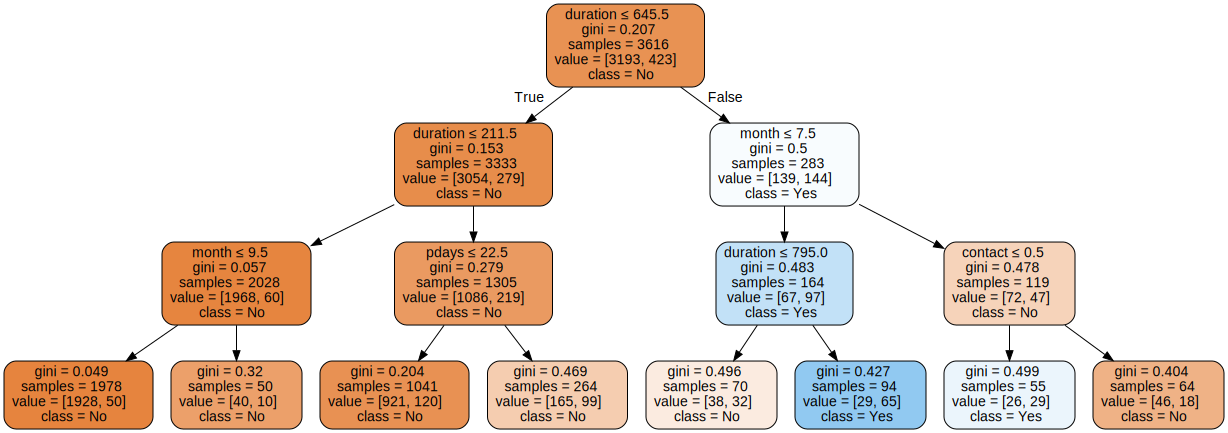

In [36]:
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(
    dt_classifier, 
    out_file=None,  
    feature_names=X.columns,  
    class_names=['No', 'Yes'],  
    filled=True,  
    rounded=True,  
    special_characters=True
)

# Render the tree
graph = graphviz.Source(dot_data)
graph


### CONCLUSION:

We built a Decision Tree classifier to predict whether a customer will purchase a bank term deposit based on demographic and behavioral data. The model helped identify key decision factors like contact type, previous campaign success, and age. While the Decision Tree provided clear, interpretable rules, it had some overfitting issues, which we improved by implementing a Random Forest model. 

This boosted accuracy, reduced overfitting, and provided better generalization.The insights from our model can help banks optimize marketing strategies by targeting the right customers. Feature importance analysis revealed the most influential factors, making the model valuable for business decision-making.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=8a4610a6-102b-47ed-a44f-2c5aadf49cda' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>